In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df=pd.read_csv('/content/finaldata.csv')


In [6]:
df.head()

,S.No,Age (yrs),Sex,BASELINE\nBMI (Kg/m2),job type,FBS,PPBS,baseline HBA1C,cholestrol,triglycerides,hdl,ldl,Diagnosis,Calories,Protein,Fats
0,1.0,57.0,1.0,27.6,0.0,169.0,226.0,8.8,145.0,109.0,37.0,90.0,0.0,1500.0,60.0,15.0
1,2.0,59.0,2.0,27.0,0.0,113.0,221.0,8.2,171.0,109.0,41.0,105.0,0.0,1500.0,50.0,15.0
2,3.0,54.0,2.0,30.2,1.0,193.0,307.0,9.4,189.0,174.0,63.0,101.0,1.0,1500.0,50.0,15.0
3,4.0,59.0,1.0,31.2,0.0,168.0,276.0,8.9,155.0,90.0,37.0,92.0,1.0,1500.0,60.0,15.0
4,5.0,58.0,1.0,31.4,0.0,127.0,291.0,7.5,131.0,66.0,25.0,83.0,1.0,1500.0,60.0,15.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No                  297 non-null    float64
 1   Age (yrs)             297 non-null    float64
 2   Sex                   297 non-null    float64
 3   BASELINE
BMI (Kg/m2)  297 non-null    float64
 4   job type              297 non-null    float64
 5   FBS                   295 non-null    float64
 6   PPBS                  296 non-null    float64
 7   baseline HBA1C        296 non-null    float64
 8   cholestrol            286 non-null    float64
 9   triglycerides         286 non-null    float64
 10  hdl                   286 non-null    float64
 11  ldl                   286 non-null    float64
 12  Diagnosis             297 non-null    float64
 13  Calories              297 non-null    float64
 14  Protein               297 non-null    float64
 15  Fats                  2

In [8]:
df.isnull().sum()

,0
S.No,2
Age (yrs),2
Sex,2
BASELINE\nBMI (Kg/m2),2
job type,2
FBS,4
PPBS,3
baseline HBA1C,3
cholestrol,13
triglycerides,13


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

,0
S.No,0
Age (yrs),0
Sex,0
BASELINE\nBMI (Kg/m2),0
job type,0
FBS,0
PPBS,0
baseline HBA1C,0
cholestrol,0
triglycerides,0


In [11]:
df.shape

(285, 16)

In [12]:
X=df.iloc[:,:13].values
Y=df.iloc[:,13:].values


In [13]:
df.head()

,S.No,Age (yrs),Sex,BASELINE\nBMI (Kg/m2),job type,FBS,PPBS,baseline HBA1C,cholestrol,triglycerides,hdl,ldl,Diagnosis,Calories,Protein,Fats
0,1.0,57.0,1.0,27.6,0.0,169.0,226.0,8.8,145.0,109.0,37.0,90.0,0.0,1500.0,60.0,15.0
1,2.0,59.0,2.0,27.0,0.0,113.0,221.0,8.2,171.0,109.0,41.0,105.0,0.0,1500.0,50.0,15.0
2,3.0,54.0,2.0,30.2,1.0,193.0,307.0,9.4,189.0,174.0,63.0,101.0,1.0,1500.0,50.0,15.0
3,4.0,59.0,1.0,31.2,0.0,168.0,276.0,8.9,155.0,90.0,37.0,92.0,1.0,1500.0,60.0,15.0
4,5.0,58.0,1.0,31.4,0.0,127.0,291.0,7.5,131.0,66.0,25.0,83.0,1.0,1500.0,60.0,15.0


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=10)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

decision_tree = DecisionTreeClassifier(random_state=0)

# Creating a multi-output classifier using Decision Tree
multi_target_classifier = MultiOutputClassifier(decision_tree)

# Fitting the multi-output classifier on the training data
multi_target_classifier.fit(X_train, Y_train)

# Making predictions on the test data
predictions = multi_target_classifier.predict(X_test)


In [17]:
multi_target_classifier.score(X_test,Y_test)


0.9736842105263158

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = MultiOutputClassifier(RandomForestClassifier())

In [19]:
clf.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [20]:
y_pred = clf.predict(X)

In [21]:
clf.score(X_test,Y_test)


0.9649122807017544

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier


In [23]:
nb = MultiOutputClassifier(GaussianNB())

nb.fit(X_train,Y_train)


MultiOutputClassifier(estimator=GaussianNB())

In [24]:
nb.score(X_test,Y_test)

0.9736842105263158

Diagnosis
0.0          148
1.0           96
2.0           32
3.0            9
Name: count, dtype: int64


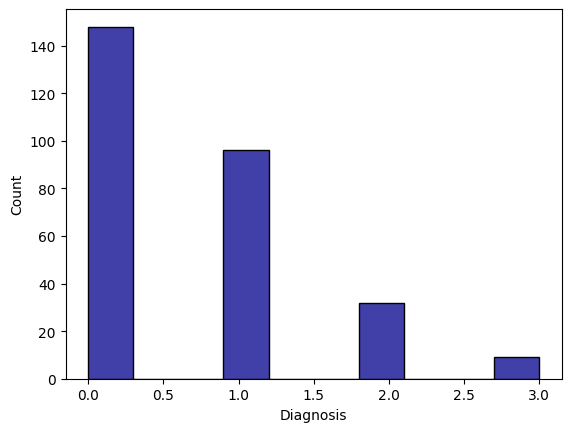

In [51]:
print(df[['Diagnosis']].value_counts())
sns.histplot(df['Diagnosis'],color='darkblue');

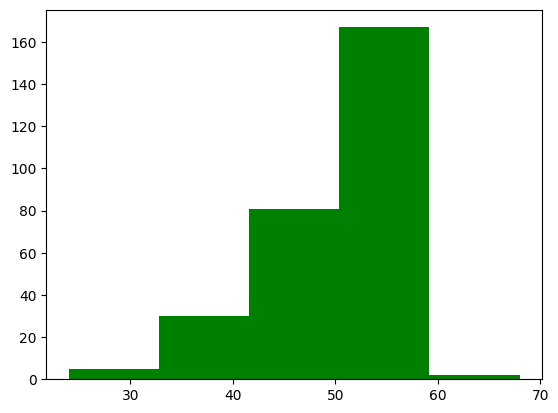

In [44]:
df['Age (yrs)'].hist(bins=5,grid=False,color='g');

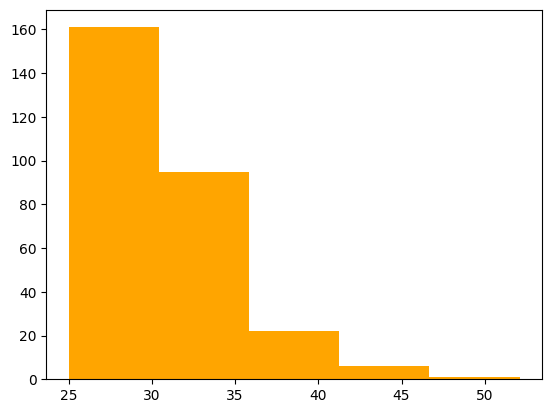

In [64]:
df['BASELINE\nBMI (Kg/m2)'].hist(bins=5,grid=False,color='orange');